# Inverter Data Set

**Three-Phase IGBT Two-Level Inverter for Electrical Drives**

*В данной работе необходимо предсказать величину напряжения по каждой фазе. Датасет взят с [Kaggle](https://www.kaggle.com/datasets/stender/inverter-data-set)*

## Содержание <a class="anchor" id="0"></a>

1. [Введение](#1)
2. [Описание признаков](#2)
3. [Импорты библиотек](#3)
4. [Загрузка датасета](#4)
5. [Исследование датасета](#5)
6. [Моделирование](#6)
   - 6.1 [Прямая задача](#6.1)
   - 6.2 [Обратная задача](#6.2)
7. [Заключение](#7)

## 1. Введение <a class="anchor" id="1"></a>

[Наверх](#0)

В данной работе мы рассмотрим модель управления трёхфазным асинхронным двигателем с помощью IGBT-инвертера. Схема управления представлена на рисунке 1.

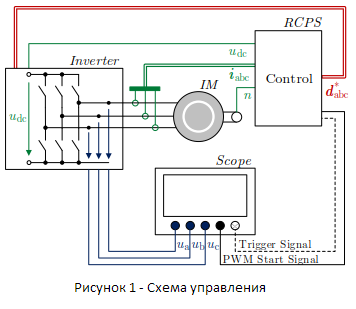

В данном случае [асинхронный двигатель (IM)](https://en.wikipedia.org/wiki/Induction_motor) питается от трехфазного IGBT-инвертера (Inverter). Инвертер - это электронное устройство, которое преобразует внешнее постоянное напряжение Udc (например, от батареи или выпрямителя) в синусоидальный сигнал в виде [широтно-импульсной модуляции (ШИМ)](https://en.wikipedia.org/wiki/Pulse-width_modulation) (рис. 2). ШИМ формируется [IGBT-ключами](https://en.wikipedia.org/wiki/Insulated-gate_bipolar_transistor), которые с определенной частотой и скважностью коммутируют внешнее напряжение. Данным процессом непосредственно управляет контроллер (RCPS). Для корректного управления скоростью вращения двигателя и регулирования крутящего момента, контроллер должен получать информацию от датчика оборотов и датчиков тока по каждой фазе (обычно это бесконтактные датчики Холла). Также необходимо знать значения напряжений на обмотках электродвигателя.

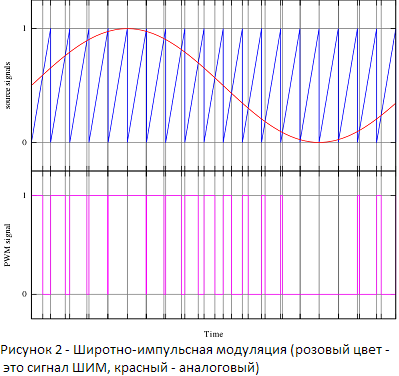

У идеального инвертера это напряжение может однозначно определяться умножением напряжения питания на коэффициент заполнения ШИМ (duty cycle). Для реального IGBT-инвертера данное соотношение не выполняется в силу различных нелинейных эффектов и потерь в полупроводниковых ключах. Точная информация о напряжении необходима для обеспечения точных и эффективных динамических характеристик электродвигателей, особенно во время работы с регулируемым крутящим моментом (например, у электромобилей). Измерение данного напряжения сопряжено с определёнными техническими сложностями и требует дополнительных затрат. Таким образом, нашей задачей является точное предсказание напряжения по каждой из фаз на основании информации, получаемой от других датчиков. 

Можно рассмотреть и обратную задачу: зная желаемый уровень напряжения на обмотках электродвигателя, вычислить коэффициент заполнения ШИМ, при котором будут компенсированы потери напряжения.

## 2. Описание признаков <a class="anchor" id="2"></a>

[Наверх](#0)

1) **n_k**: *частота вращения двигателя на к-м отсчёте, (об/мин);*
2) **u_dc_k**: *напряжение на шине DC на к-м отсчёте, (В);*
3) **u_dc_k-1**: *напряжение на шине DC на (к-1)-м отсчёте, (В);*
4) **u_dc_k-2**: *напряжение на шине DC на (к-2)-м отсчёте, (В);*
5) **u_dc_k-3**: *напряжение на шине DC на (к-3)-м отсчёте, (В);*
6) **i_a_k**: *ток фазы A на к-м отсчёте, (А);*
7) **i_b_k**: *ток фазы B на к-м отсчёте, (А);*
8) **i_c_k**: *ток фазы C на к-м отсчёте, (А);*
9) **i_a_k-1**: *ток фазы A на (к-1)-м отсчёте, (А);*
10) **i_b_k-1**: *ток фазы B на (к-1)-м отсчёте, (А);*
11) **i_c_k-1**: *ток фазы C на (к-1)-м отсчёте, (А);*
12) **i_a_k-2**: *ток фазы A на (к-2)-м отсчёте, (А);*
13) **i_b_k-2**: *ток фазы B на (к-2)-м отсчёте, (А);*
14) **i_c_k-2**: *ток фазы C на (к-2)-м отсчёте, (А);*
15) **i_a_k-3**: *ток фазы A на (к-3)-м отсчёте, (А);*
16) **i_b_k-3**: *ток фазы B на (к-3)-м отсчёте, (А);*
17) **i_c_k-3**: *ток фазы C на (к-3)-м отсчёте, (А);*
18) **d_a_k-2**: *коэффициент заполнения для фазы A на (к-2)-м отсчёте;*
19) **d_b_k-2**: *коэффициент заполнения для фазы B на (к-2)-м отсчёте;*
20) **d_c_k-2**: *коэффициент заполнения для фазы C на (к-2)-м отсчёте;*
21) **d_a_k-3**: *коэффициент заполнения для фазы A на (к-3)-м отсчёте;*
22) **d_b_k-3**: *коэффициент заполнения для фазы B на (к-3)-м отсчёте;*
23) **d_c_k-3**: *коэффициент заполнения для фазы C на (к-3)-м отсчёте;*
24) **u_a_k-1**: *измеренное напряжение на фазе A на (к-1)-м отсчёте, (В);*
25) **u_b_k-1**: *измеренное напряжение на фазе B на (к-1)-м отсчёте, (В);*
26) **u_c_k-1**: *измеренное напряжение на фазе C на (к-1)-м отсчёте, (В);*

## 3. Импорты библиотек <a class="anchor" id="3"></a>

[Наверх](#0)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## 4. Загрузка датасета <a class="anchor" id="4"></a>

[Наверх](#0)

Импортируем необходимые модули для работы с файлами и API Kaggle

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
from pathlib import Path
from zipfile import ZipFile

Определим две константы. **DATASET_NAME** берём из Kaggle API команды, а в **PATH** запишем каталог, в который сохраним csv-файл с датасетом

In [3]:
DATASET_NAME = 'stender/inverter-data-set'
PATH = 'data'

In [4]:
def load_dataset():
    if not Path(PATH).is_dir():
        api = KaggleApi()
        api.authenticate()
        api.dataset_download_files(DATASET_NAME, path=PATH)
        zip_path = PATH + '/' + DATASET_NAME.split('/')[1] + '.zip'
        with ZipFile(zip_path, 'r') as zip:
            zip.extractall(PATH)
        Path(zip_path).unlink(missing_ok=True)
        print('Файл успешно загружен')
    return pd.read_csv(Path(PATH).iterdir().__next__(), sep=',')

In [5]:
df = load_dataset()

Файл успешно загружен


## 5. Исследование датасета <a class="anchor" id="5"></a>

[Наверх](#0)

In [6]:
df.head()

,n_k,u_dc_k,u_dc_k-1,u_dc_k-2,u_dc_k-3,i_a_k,i_b_k,i_c_k,i_a_k-1,i_b_k-1,...,i_c_k-3,d_a_k-2,d_b_k-2,d_c_k-2,d_a_k-3,d_b_k-3,d_c_k-3,u_a_k-1,u_b_k-1,u_c_k-1
0,3001.406296,567.985297,567.689956,567.431534,567.948379,2.461991,-1.792057,-0.716639,2.729208,-2.098439,...,-0.613965,0.667181,0.874633,0.125367,0.706206,0.862754,0.137246,360.541201,510.640963,82.471117
1,3001.468250,567.911462,567.985297,567.689956,567.431534,2.292110,-1.556948,-0.757338,2.461991,-1.792057,...,-0.758263,0.642184,0.880046,0.119954,0.667181,0.874633,0.125367,346.410081,513.190083,79.729357
2,3001.527815,567.911462,567.911462,567.985297,567.689956,2.155288,-1.332946,-0.840587,2.292110,-1.556948,...,-0.698139,0.611911,0.884307,0.115693,0.642184,0.880046,0.119954,329.440240,515.804643,77.924637
3,3001.585080,567.653039,567.911462,567.911462,567.985297,2.048768,-1.135788,-0.925686,2.155288,-1.332946,...,-0.716639,0.578149,0.888915,0.111085,0.611911,0.884307,0.115693,311.058880,517.537603,75.478717
4,3001.640131,567.579204,567.653039,567.911462,567.911462,1.952350,-0.918266,-1.027434,2.048768,-1.135788,...,-0.757338,0.541979,0.892123,0.107877,0.578149,0.888915,0.111085,290.481760,519.138403,73.580077


Оценим размер датасета

In [7]:
df.shape

(234527, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234527 entries, 0 to 234526
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   n_k       234527 non-null  float64
 1   u_dc_k    234527 non-null  float64
 2   u_dc_k-1  234527 non-null  float64
 3   u_dc_k-2  234527 non-null  float64
 4   u_dc_k-3  234527 non-null  float64
 5   i_a_k     234527 non-null  float64
 6   i_b_k     234527 non-null  float64
 7   i_c_k     234527 non-null  float64
 8   i_a_k-1   234527 non-null  float64
 9   i_b_k-1   234527 non-null  float64
 10  i_c_k-1   234527 non-null  float64
 11  i_a_k-2   234527 non-null  float64
 12  i_b_k-2   234527 non-null  float64
 13  i_c_k-2   234527 non-null  float64
 14  i_a_k-3   234527 non-null  float64
 15  i_b_k-3   234527 non-null  float64
 16  i_c_k-3   234527 non-null  float64
 17  d_a_k-2   234527 non-null  float64
 18  d_b_k-2   234527 non-null  float64
 19  d_c_k-2   234527 non-null  float64
 20  d_a_

Нулевые значения отсутствуют

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_k,234527.0,1728.414990,1084.463934,404.433935,507.572918,1501.516456,2996.851500,3231.756077
u_dc_k,234527.0,567.136398,4.993615,548.012908,566.730100,568.649812,570.126514,575.553392
u_dc_k-1,234527.0,567.136565,4.993462,548.012908,566.730100,568.649812,570.126514,575.553392
u_dc_k-2,234527.0,567.136718,4.993317,548.012908,566.730100,568.649812,570.126514,575.553392
u_dc_k-3,234527.0,567.136882,4.993180,548.012908,566.730100,568.649812,570.126514,575.553392
i_a_k,234527.0,0.000505,2.199349,-7.300153,-1.573353,0.023062,1.552902,7.470243
i_b_k,234527.0,-0.007692,2.155399,-6.320221,-1.576386,0.000881,1.557785,6.668168
i_c_k,234527.0,-0.008975,2.216263,-7.112914,-1.591675,0.010400,1.566225,7.437108
i_a_k-1,234527.0,0.000518,2.199206,-7.300153,-1.572894,0.023062,1.552902,7.470243
i_b_k-1,234527.0,-0.007737,2.155302,-6.320221,-1.576386,0.000881,1.557785,6.668168


Судя по статистикам, все значения находятся в допустимых пределах и выбросы отсутствуют. Посмотрим на распределения величин

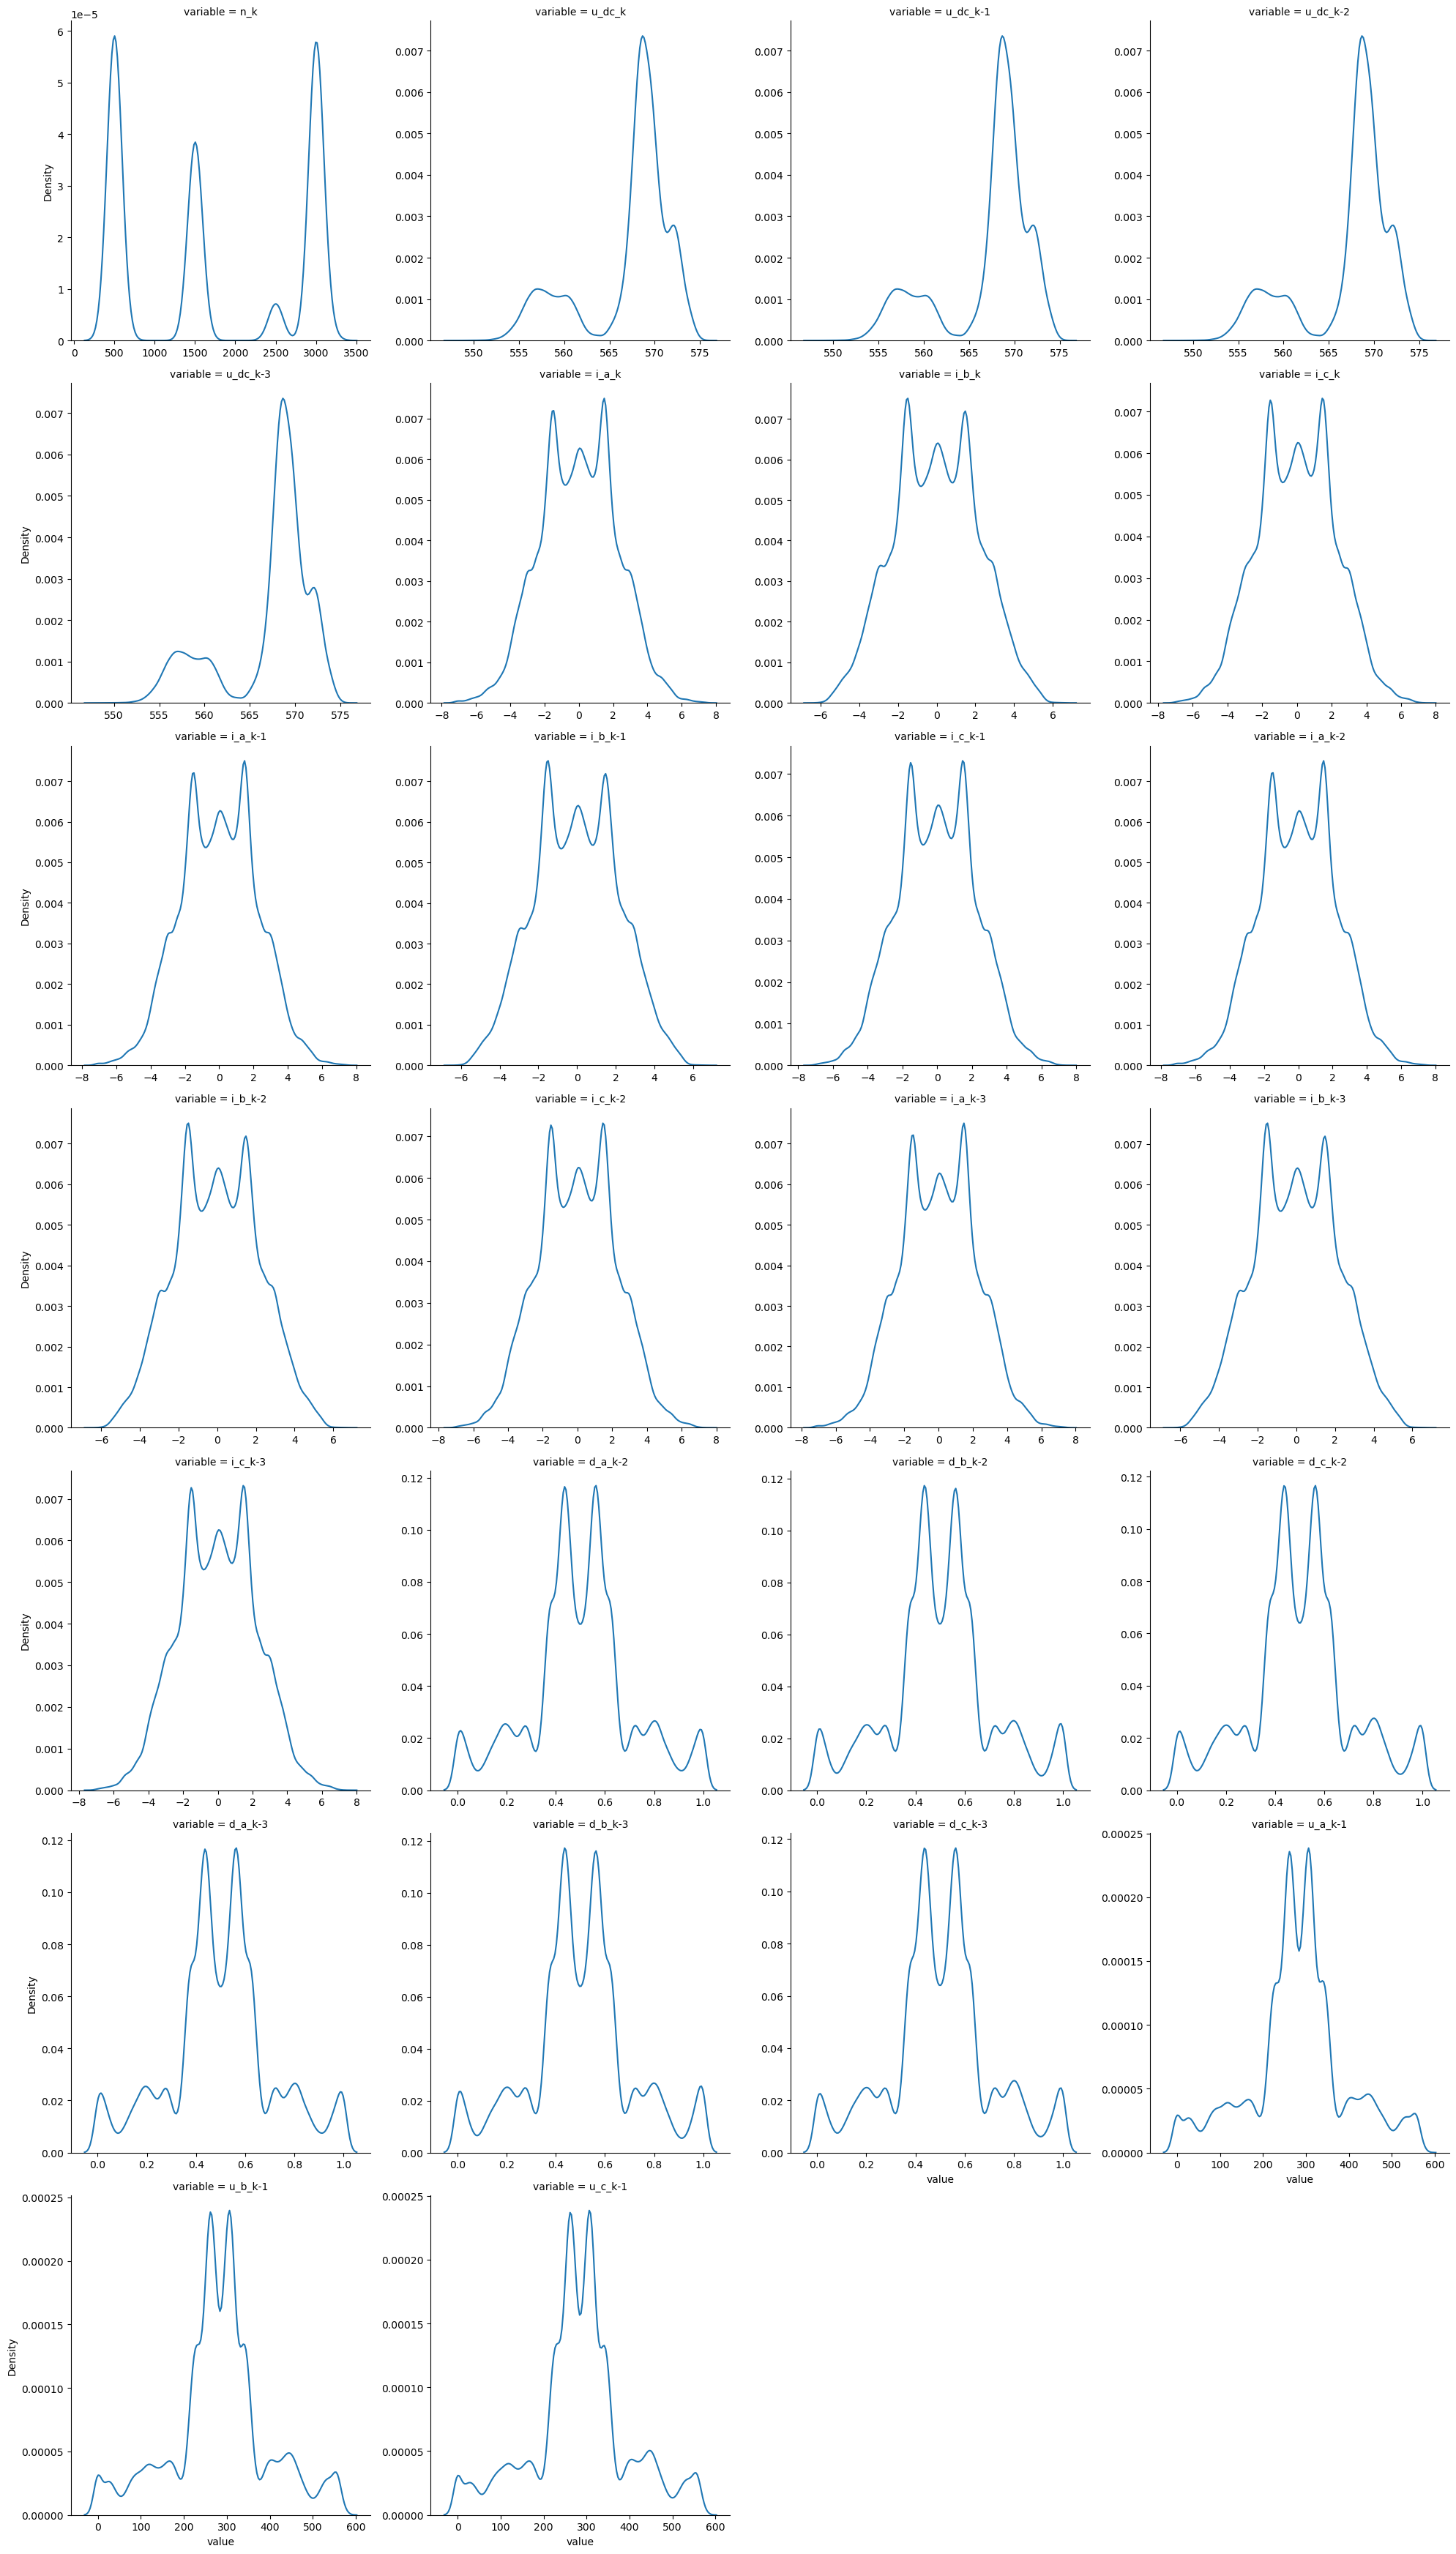

In [10]:
ax=sns.displot(
    x='value',
    data=df.melt(value_vars=df),
    col='variable',
    kind='kde',
    col_wrap=4,
    facet_kws=dict(sharex=False, sharey=False)
)
ax.tight_layout();

Что видно по данным распределениям:
- электродвигатель работал в основном в трёх режимах (500, 1500 и 3000 об/мин);
- напряжение внешней питающей шины по большей части составляло примерно 570 В;
- распределения токов почти симметричны и похожи между собой;
- распределения скважности и напряжения очень похожи по форме, что вполне логично - одно является прямым следствием другого (корреляции у этих признаков будут очень высокие)

Рассмотрим корреляции признаков

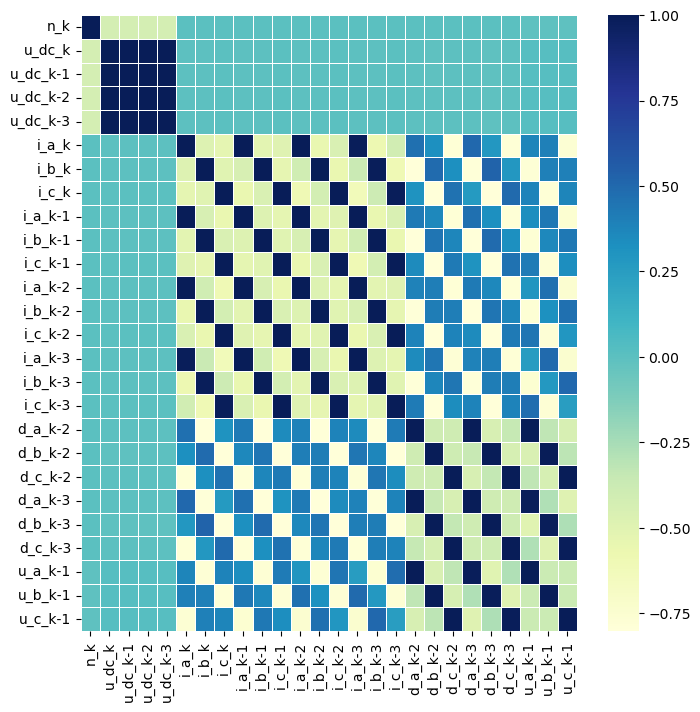

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(
    df.corr(), 
    cmap='YlGnBu',
    linewidth=.5
);

Видны отрицательные корреляции между токами каждой фазы, что вполне логично, так как разность фаз составляет 120&deg;. Как предполагалось, имеют место очень сильные корреляции между коэффициентом заполнения и напряжением фаз.

Сравним измеренные значения целевых параметров с расчётными

In [12]:
ui_a = df['d_a_k-2'] * df['u_dc_k-2']
ui_b = df['d_b_k-2'] * df['u_dc_k-2']
ui_c = df['d_c_k-2'] * df['u_dc_k-2']

Построим графики для первых 200 значений 

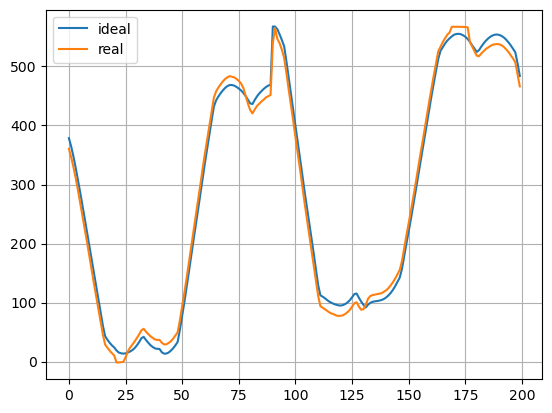

In [13]:
plt.plot(np.arange(len(ui_a))[:200], ui_a[:200], label='ideal')
plt.plot(np.arange(len(ui_a))[:200], df['u_a_k-1'][:200], label='real')
plt.legend()
plt.grid(True)

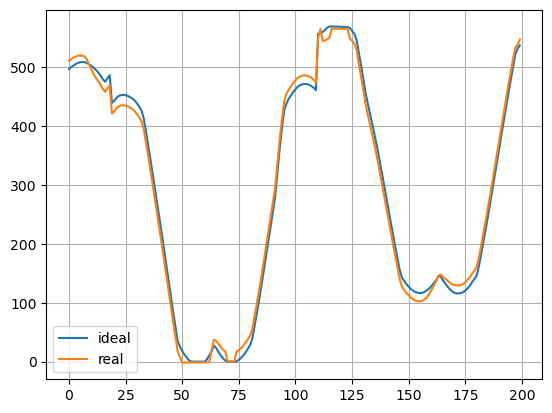

In [14]:
plt.plot(np.arange(len(ui_b))[:200], ui_b[:200], label='ideal')
plt.plot(np.arange(len(ui_b))[:200], df['u_b_k-1'][:200], label='real')
plt.legend()
plt.grid(True)

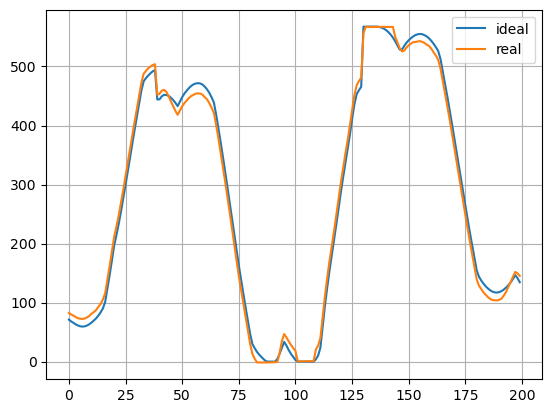

In [15]:
plt.plot(np.arange(len(ui_c))[:200], ui_c[:200], label='ideal')
plt.plot(np.arange(len(ui_c))[:200], df['u_c_k-1'][:200], label='real')
plt.legend()
plt.grid(True)

Как видно, некоторые значения очень сильно не совпадают, хотя визуально так не кажется. По факту это примерно 10 В, что неприемлемо. Посчитаем метрику RMSE, так как в данном случае она предпочтительней, чем MAE (потому что в данных отсутствуют выбросы)

In [16]:
print(f'RMSE для фазы A = {mean_squared_error(df["u_a_k-1"], ui_a, squared=False)}')
print(f'RMSE для фазы B = {mean_squared_error(df["u_b_k-1"], ui_b, squared=False)}')
print(f'RMSE для фазы C = {mean_squared_error(df["u_c_k-1"], ui_c, squared=False)}')

RMSE для фазы A = 14.066274927829221
RMSE для фазы B = 14.265365803855747
RMSE для фазы C = 13.698649655801262


Как видно, значения RMSE очень большие! При моделировании будем отталкиваться от этих показателей

## 6. Моделирование <a class="anchor" id="6"></a>

### 6.1 Прямая задача <a class="anchor" id="6.1"></a>

[Наверх](#0)

Прежде чем приступить к моделированию, разделим наш датасет на три независимых датасета для каждой из фаз

In [17]:
a_columns = [f for f in df.columns if f[2]=='a']
df_a = df[df.columns[:5].tolist()+a_columns]
df_a.head()

,n_k,u_dc_k,u_dc_k-1,u_dc_k-2,u_dc_k-3,i_a_k,i_a_k-1,i_a_k-2,i_a_k-3,d_a_k-2,d_a_k-3,u_a_k-1
0,3001.406296,567.985297,567.689956,567.431534,567.948379,2.461991,2.729208,3.119473,3.045093,0.667181,0.706206,360.541201
1,3001.468250,567.911462,567.985297,567.689956,567.431534,2.292110,2.461991,2.729208,3.119473,0.642184,0.667181,346.410081
2,3001.527815,567.911462,567.911462,567.985297,567.689956,2.155288,2.292110,2.461991,2.729208,0.611911,0.642184,329.440240
3,3001.585080,567.653039,567.911462,567.911462,567.985297,2.048768,2.155288,2.292110,2.461991,0.578149,0.611911,311.058880
4,3001.640131,567.579204,567.653039,567.911462,567.911462,1.952350,2.048768,2.155288,2.292110,0.541979,0.578149,290.481760


In [18]:
b_columns = [f for f in df.columns if f[2]=='b']
df_b = df[df.columns[:5].tolist()+b_columns]
df_b.head()

,n_k,u_dc_k,u_dc_k-1,u_dc_k-2,u_dc_k-3,i_b_k,i_b_k-1,i_b_k-2,i_b_k-3,d_b_k-2,d_b_k-3,u_b_k-1
0,3001.406296,567.985297,567.689956,567.431534,567.948379,-1.792057,-2.098439,-2.414078,-2.484426,0.874633,0.862754,510.640963
1,3001.468250,567.911462,567.985297,567.689956,567.431534,-1.556948,-1.792057,-2.098439,-2.414078,0.880046,0.874633,513.190083
2,3001.527815,567.911462,567.911462,567.985297,567.689956,-1.332946,-1.556948,-1.792057,-2.098439,0.884307,0.880046,515.804643
3,3001.585080,567.653039,567.911462,567.911462,567.985297,-1.135788,-1.332946,-1.556948,-1.792057,0.888915,0.884307,517.537603
4,3001.640131,567.579204,567.653039,567.911462,567.911462,-0.918266,-1.135788,-1.332946,-1.556948,0.892123,0.888915,519.138403


In [19]:
c_columns = [f for f in df.columns if f[2]=='c']
df_c = df[df.columns[:5].tolist()+c_columns]
df_c.head()

,n_k,u_dc_k,u_dc_k-1,u_dc_k-2,u_dc_k-3,i_c_k,i_c_k-1,i_c_k-2,i_c_k-3,d_c_k-2,d_c_k-3,u_c_k-1
0,3001.406296,567.985297,567.689956,567.431534,567.948379,-0.716639,-0.698139,-0.758263,-0.613965,0.125367,0.137246,82.471117
1,3001.468250,567.911462,567.985297,567.689956,567.431534,-0.757338,-0.716639,-0.698139,-0.758263,0.119954,0.125367,79.729357
2,3001.527815,567.911462,567.911462,567.985297,567.689956,-0.840587,-0.757338,-0.716639,-0.698139,0.115693,0.119954,77.924637
3,3001.585080,567.653039,567.911462,567.911462,567.985297,-0.925686,-0.840587,-0.757338,-0.716639,0.111085,0.115693,75.478717
4,3001.640131,567.579204,567.653039,567.911462,567.911462,-1.027434,-0.925686,-0.840587,-0.757338,0.107877,0.111085,73.580077


Обучение будем проводить на датасете для фазы А

In [20]:
X_a = df_a.drop('u_a_k-1', axis=1)
y_a = df_a['u_a_k-1'].copy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.2, random_state=42)

In [22]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

Попробуем сначала линейную модель

In [23]:
lin_reg = LinearRegression()

In [24]:
scores = cross_val_score(lin_reg, X_train_std, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([6.21168678, 6.21381361, 6.26003411, 6.25085593, 6.20379651])

Значение RMSE получилось намного лучше, но всё-равно ещё большое. Посмотрим чему равен коэффициент детерминации

In [25]:
lin_reg.fit(X_train_std, y_train)
print(f'R^2 на тренировочной выборке = {lin_reg.score(X_train_std, y_train)}')
print(f'R^2 на тестовой выборке = {lin_reg.score(X_test_std, y_test)}')

R^2 на тренировочной выборке = 0.9970528964017344
R^2 на тестовой выборке = 0.9970514119251833


Как видно, значение для тестовой выборки сопоставимо со значением для тренировочной выборки. Попробуем дерево принятия решений

***

In [26]:
tre_reg = DecisionTreeRegressor(random_state=42)

In [27]:
scores = cross_val_score(tre_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([1.06894082, 1.09470765, 1.09063826, 1.11524142, 1.08534408])

In [28]:
rmse_scores.mean(), rmse_scores.std()

(1.0909744453541956, 0.014967414948030628)

Получили очень хорошие значения RMSE. Посмотрим чему равен коэффициент детерминации

In [29]:
tre_reg.fit(X_train, y_train)
print(f'R^2 на тренировочной выборке = {tre_reg.score(X_train, y_train)}')
print(f'R^2 на тестовой выборке = {tre_reg.score(X_test, y_test)}')

R^2 на тренировочной выборке = 1.0
R^2 на тестовой выборке = 0.9999137670712624


Посмотрим RMSE на тестовой выборке

In [30]:
mean_squared_error(y_test, tre_reg.predict(X_test), squared=False)

1.0620865174390164

Отлично! Посмотрим на важность признаков

In [31]:
def plot_feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = X_train.columns
    plt.title(f'Важность признаков для {model.__class__.__name__}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])

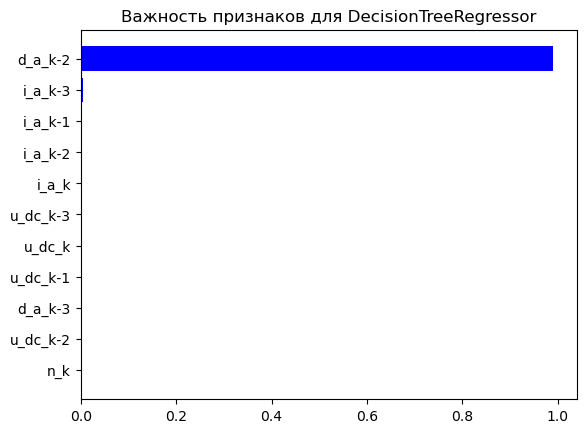

In [32]:
plot_feature_importance(tre_reg)

Как видим, наша модель основывается всего на двух признаках, а коэффициент заполнения ожидаемо является ключевым. За счёт учёта тока на предыдущем цикле мы получаем необходимую поправку. Теперь обучим нашу модель на всём датасете фазы А и попробуем предсказать значения напряжений для фаз B и C

In [33]:
tre_reg.fit(X_a, y_a)

DecisionTreeRegressor(random_state=42)

In [34]:
X_b = df_b.drop('u_b_k-1', axis=1)
y_b = df_b['u_b_k-1'].copy()

In [35]:
print(f'R^2 для фазы B = {tre_reg.score(X_b, y_b)}')
print(f'RMSE для фазы B = {mean_squared_error(y_b, tre_reg.predict(X_b), squared=False)}')

R^2 для фазы B = 0.9998940269597848
RMSE для фазы B = 1.176544963837092


In [36]:
X_c = df_c.drop('u_c_k-1', axis=1)
y_c = df_c['u_c_k-1'].copy()

In [37]:
print(f'R^2 для фазы C = {tre_reg.score(X_c, y_c)}')
print(f'RMSE для фазы C = {mean_squared_error(y_c, tre_reg.predict(X_c), squared=False)}')

R^2 для фазы C = 0.9998847306198653
RMSE для фазы C = 1.2304520551218217


Как видно, значения RMSE для фаз B и C получились немного хуже, чем для фазы A. Но, в целом, результат получился приемлемым. Теперь попробуем случайный лес

***

In [38]:
rnd_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

In [39]:
scores = cross_val_score(rnd_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.68792227, 0.69512496, 0.68142875, 0.71337676, 0.6960256 ])

In [40]:
rmse_scores.mean(), rmse_scores.std()

(0.6947756686062807, 0.010703216924250846)

Отлично! RMSE получился ещё меньше!

In [41]:
rnd_reg.fit(X_train, y_train)
print(f'R^2 на тренировочной выборке = {rnd_reg.score(X_train, y_train)}')
print(f'R^2 на тестовой выборке = {rnd_reg.score(X_test, y_test)}')

R^2 на тренировочной выборке = 0.9999951261350105
R^2 на тестовой выборке = 0.9999648060660941


Посмотрим RMSE на тестовой выборке

In [42]:
mean_squared_error(y_test, rnd_reg.predict(X_test), squared=False)

0.6785115340352887

Теперь посмотрим на важность признаков

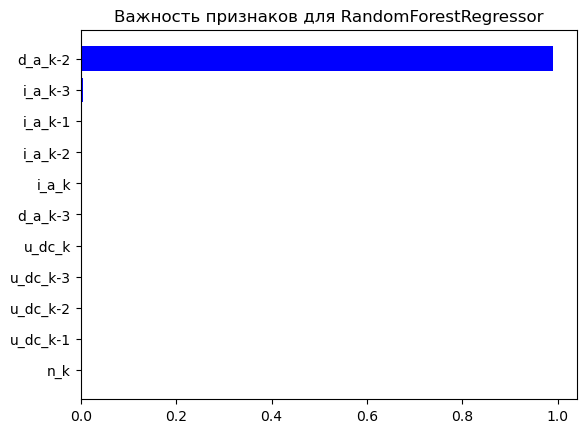

In [43]:
plot_feature_importance(rnd_reg)

Как видим, случайный лес опирается на те же признаки, что и дерево принятия решений. Снова обучим модель на всём датасете фазы А и попробуем предсказать значения напряжений для фаз B и C

In [44]:
rnd_reg.fit(X_a, y_a)
print(f'R^2 для фазы B = {rnd_reg.score(X_b, y_b)}')
print(f'RMSE для фазы B = {mean_squared_error(y_b, rnd_reg.predict(X_b), squared=False)}')

R^2 для фазы B = 0.9999478896841137
RMSE для фазы B = 0.8250355935210107


In [45]:
print(f'R^2 для фазы C = {rnd_reg.score(X_c, y_c)}')
print(f'RMSE для фазы C = {mean_squared_error(y_c, rnd_reg.predict(X_c), squared=False)}')

R^2 для фазы C = 0.9999390167961502
RMSE для фазы C = 0.8949789805293027


И сравним визуально реальные и предсказанные значения напряжения для фазы B

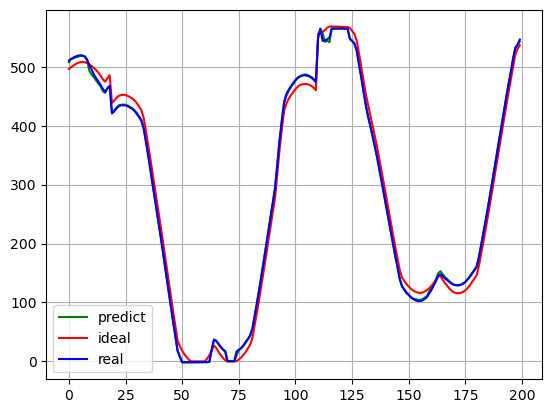

In [46]:
plt.plot(np.arange(len(ui_b))[:200], rnd_reg.predict(X_b)[:200], label='predict', c='green')
plt.plot(np.arange(len(ui_b))[:200], ui_b[:200], label='ideal', c='red')
plt.plot(np.arange(len(ui_b))[:200], df['u_b_k-1'][:200], label='real', c='blue')
plt.legend()
plt.grid(True)

Как видим, кривые почти совпадают. Рассмотрим теперь обратную задачу

### 6.2 Обратная задача <a class="anchor" id="6.2"></a>

[Наверх](#0)

В данном случае метками будут являться значения коэффициента заполнения

In [47]:
X_a = df_a.drop('d_a_k-2', axis=1)
y_a = df_a['d_a_k-2'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.2, random_state=42)

In [48]:
rnd_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
scores = cross_val_score(rnd_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.00182238, 0.00189243, 0.0017767 , 0.00194003, 0.00182   ])

In [49]:
rmse_scores.mean(), rmse_scores.std()

(0.0018503061962981478, 5.820808281553791e-05)

Учитывая, что коэффициент заполнения изменяется от 0 до 1, то мы получили очень хорошее значение RMSE

In [50]:
rnd_reg.fit(X_train, y_train)
print(f'R^2 на тренировочной выборке = {rnd_reg.score(X_train, y_train)}')
print(f'R^2 на тестовой выборке = {rnd_reg.score(X_test, y_test)}')
print(f'RMSE на тестовой выборке = {mean_squared_error(y_test, rnd_reg.predict(X_test), squared=False)}')

R^2 на тренировочной выборке = 0.999989870553632
R^2 на тестовой выборке = 0.9999453861197357
RMSE на тестовой выборке = 0.0015623601918432655


Посмотрим на важность признаков

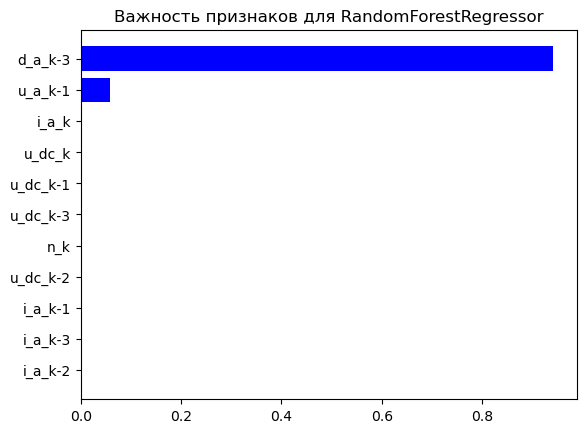

In [51]:
plot_feature_importance(rnd_reg)

Как видно, данная модель тоже опирается на два признака. Обучим модель на всём датасете фазы А и попробуем предсказать значения напряжений для всех фаз

In [52]:
X_b = df_b.drop('d_b_k-2', axis=1)
y_b = df_b['d_b_k-2'].copy()

X_c = df_c.drop('d_c_k-2', axis=1)
y_c = df_c['d_c_k-2'].copy()

In [53]:
rnd_reg.fit(X_a, y_a)
print(f'R^2 для фазы B = {rnd_reg.score(X_b, y_b)}')
print(f'RMSE для фазы B = {mean_squared_error(y_b, rnd_reg.predict(X_b), squared=False)}')
print(f'R^2 для фазы C = {rnd_reg.score(X_c, y_c)}')
print(f'RMSE для фазы C = {mean_squared_error(y_c, rnd_reg.predict(X_c), squared=False)}')

R^2 для фазы B = 0.9999129172181325
RMSE для фазы B = 0.001975956369708408
R^2 для фазы C = 0.9998960823558148
RMSE для фазы C = 0.002158602853348984


Мы получили очень достойный результат. При этом мы использовали модель, обученную только на данных одной из фаз. Если же мы обучим модель для каждой фазы, то получим ещё более лучший результат

## 7. Заключение <a class="anchor" id="7"></a>

[Наверх](#0)

С помощью модели случайного леса удалось добиться предсказания напряжения на обмотках асинхронного трёхфазного электродвигателя. Полученные результаты оказались очень хорошего качества. Удалось также решить и обратную задачу: зная желамый уровень напряжения на каждой фазе, рассчитать значение коэффициента заполнения ШИМ.  